In [ ]:
import pickle
import pandas as pd 
import numpy as np 

In [ ]:
dfmerged_orders_with_products = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/dfmerged_orders_with_products.pkl") 

In [ ]:
# Ok so I need user_id, product_id, and 'number of times it was purchased'
user_item = dfmerged_orders_with_products[['user_id', 'product_id', 'reordered']] # Maybe I can use the reordered flag to increment 

In [ ]:
del dfmerged_orders_with_products  

In [ ]:
user_item 

,user_id,product_id,reordered
0,1,196,0
1,1,26088,0
2,1,14084,0
3,1,26405,0
4,1,12427,0
...,...,...,...
33819101,206209,6846,1
33819102,206209,40603,0
33819103,206209,37966,0
33819104,206209,15655,0


In [ ]:
# The value counts of each product id for each user.
user_item[user_item['user_id']==1].product_id.value_counts()

196      11
12427    10
10258    10
25133     9
13032     4
46149     4
26405     3
26088     3
49235     3
13176     2
38928     2
39657     2
14084     1
30450     1
41787     1
17122     1
10326     1
35951     1
27845     1
Name: product_id, dtype: int64

In [ ]:
# dict_for_data_reccomendation = {'user_id':[],'product_id':[],'count':[]}
# rec_df = pd.DataFrame(dict_for_data_reccomendation)

list_of_rec_df_rows = []
i=0
for (user,p_id), frame in user_item.groupby(['user_id', 'product_id']):
  # rec_df.loc[rec_df.shape[0]] = [user, p_id,len(frame)]
  list_of_rec_df_rows.append([user, p_id,len(frame)])
  # break
  if(i%100000==0):
    print(i)
  i=i+1

In [ ]:
data_columns = ['user_id','product_id','count']
rec_df = pd.DataFrame(list_of_rec_df_rows, columns=data_columns)
rec_df 

In [ ]:
rec_df.to_pickle('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/Reccomendation_df/rec_df.pkl')

In [ ]:
rec_df = pd.read_pickle('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/Reccomendation_df/rec_df.pkl')
rec_df 

,user_id,product_id,count
0,1,196,11
1,1,10258,10
2,1,10326,1
3,1,12427,10
4,1,13032,4
...,...,...,...
13863741,206209,43961,3
13863742,206209,44325,1
13863743,206209,48370,1
13863744,206209,48697,1


In [ ]:
rec_df[rec_df['user_id']==1]

,user_id,product_id,count
0,1,196,11
1,1,10258,10
2,1,10326,1
3,1,12427,10
4,1,13032,4
5,1,13176,2
6,1,14084,1
7,1,17122,1
8,1,25133,9
9,1,26088,3


In [ ]:
rec_df['count'].max()
#  No one bought anything more than 100 times.

100

In [ ]:
rec_df['count'].value_counts()
# 8.3 million user/product combinations happened only once 

1      8299266
2      2296606
3      1074345
4       612369
5       384418
        ...   
94           5
99           4
97           4
100          3
98           2
Name: count, Length: 100, dtype: int64

In [ ]:
len(rec_df.user_id.unique())  

206209

In [ ]:
# In case I want a smaller subset of users I'll build users_150K
# But I wonder if pulling out items only ordered once or users who only ordered once would be better

users_150K = rec_df[rec_df['user_id'] < 150000]

In [ ]:
# Might be better by eliminating users with few products ordered instead of few orders
# Grouped_users is from the clustering notebook
# Need to recalculate this
grouped_users = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users/grouped_users.pkl", "rb"))
grouped_users[grouped_users['num_orders']<=5] # 49000 users with 5 or fewer orders

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
4,5,4,13.0,15.357142,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,0,16.0,12.314285,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,3,4,17.0,7.800000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4,1,0.0,22.173914,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4,5,12.0,26.117647,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206184,5,2,11.0,24.705883,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206186,4,6,15.0,16.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
206196,5,6,15.0,25.569767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0


In [ ]:
grouped_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 1 to 206209
Columns: 138 entries, num_orders to aisle_yogurt
dtypes: float32(1), float64(135), int64(1), int8(1)
memory usage: 216.5 MB


In [ ]:
products_with_count = rec_df.groupby('product_id').sum().drop(columns='user_id').sort_values(by='count')
products_with_count[products_with_count['count']<=5]  # 2741 products ordered 5 times or less

,count
product_id,
36233,1
11254,1
43098,1
14485,1
7626,1
...,...
8009,5
45085,5
6525,5


# Modelling a Recommendation System

In [ ]:
!pip install surprise

ERROR: Operation cancelled by user


In [ ]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD 
from surprise import KNNBaseline 
from surprise import KNNBasic 
from surprise.model_selection import train_test_split 
from surprise.prediction_algorithms import knns 
from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy

In [ ]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 100))

# The columns must correspond to user id, item id and ratings (in that order).
rec_data = Dataset.load_from_df(rec_df, reader)

NameError: ignored

In [ ]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(rec_data, test_size=.25, random_state=12)

In [ ]:
rec_df.head()

In [ ]:
import time

In [ ]:
# Start with a memory-based model
# These just take up too much memory for the size of my data.  Moving on to model-based.

# sim_cos = {'name':'cosine', 'user_based':False}

# tic = time.time()

# basic = knns.KNNBasic(sim_options=sim_cos)
# basic.fit(trainset)

# fit_time = time.time()-tic
# print('fit ', fit_time)

In [ ]:
# Can't believe I got this to work on the whole data set

tic = time.time()

svd_algo = SVD()

svd_algo.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

svd_algo_predictions = svd_algo.test(testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(svd_algo_predictions)

# 3.46 RMSE on a scale of 1-100 is pretty darn good, but my data is so skewed it may be misleading.

In [ ]:
pickle.dump(svd_algo, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/svd_algo.p", "wb"))
pickle.dump(svd_algo_predictions, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/svd_algo_predictions.p", "wb"))

In [ ]:
svd_algo = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/svd_algo.p", "rb"))
svd_algo_predictions = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/svd_algo_predictions.p", "rb"))
accuracy.rmse(svd_algo_predictions)

In [ ]:
# Picking a random user to look at one of their ratings

rec_df[rec_df['user_id'] == 196]

In [ ]:
uid=196
iid=13176
# actual value was 2, prediction is 1.77
pred = svd_algo.predict(uid, iid, r_ui=2, verbose=True)

In [ ]:
# Examining the first record in my test set for its actual value
testset[0]

In [ ]:
# Prediction is 1.15
pred = svd_algo.predict(127895, 6101, r_ui=2, verbose=True)

In [ ]:
svd_algo_predictions[0]

In [ ]:
SVD

# Perform a grid Search

In [ ]:
# Started at 6:45pm, ended at 9:30

# param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]} 
# gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs = -1, joblib_verbose=5)
# gs_model.fit(rec_data)
# pickle.dump(gs_model, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/gs_model.p", "wb"))

In [ ]:
# Creating the model from the best params

tic = time.time()

svd_best_gs = SVD(n_factors = 100, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

svd_best_gs.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

svd_best_gs_predictions = svd_best_gs.test(testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(svd_best_gs_predictions)

# RMSE went down on grid search model from 3.4616 to 3.2483

fit  370.9870889186859
pred  75.83546209335327
RMSE: 3.2391


3.239057193416181

# Try a different rating scale

In [ ]:
# I am curious how the model predicts one of the items purchased 100 times

max(testset,key=lambda item:item[2])

(17997, 4210, 99.0)

In [ ]:
# This one was predicted to be 22.27, that's pretty far off

# pred = svd_best_gs.predict(41356,38652, r_ui=100.0, verbose=True)
pred = svd_best_gs.predict(17997,4210, r_ui=99.0, verbose=True)

user: 17997      item: 4210       r_ui = 99.00   est = 49.50   {'was_impossible': False}


In [ ]:
# What is my highest prediction?  53.221 on a true rating of 96

# It seems like the model gets worse for higher ratings

top_est = 0
top_pred = [0,0,0,0]
for uid, iid, true_r, est, _ in svd_best_gs_predictions:
    if est > top_est:
        top_est = est
        top_pred = [uid,iid,true_r,est]
top_pred        

[140440, 19156, 37.0, 74.27454011716559]

In [ ]:
# Perhaps I can convert into a rating on a 1 to 5 scale
rec_df['count'].value_counts()

1      8299266
2      2296606
3      1074345
4       612369
5       384418
        ...   
94           5
99           4
97           4
100          3
98           2
Name: count, Length: 100, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

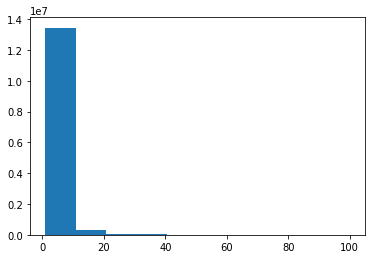

In [ ]:
plt.hist(rec_df['count']);

In [ ]:
# Well I'm not sure if this is the best way, but there are so few above 5 I think I can group them all together
rec_df['rating'] = rec_df['count'].apply(lambda x: 5 if (x >= 5) else x)

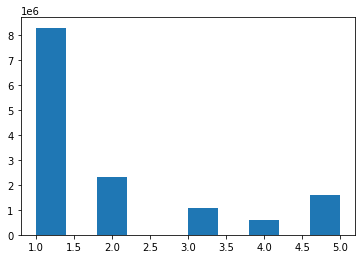

In [ ]:
plt.hist(rec_df['rating']);

In [ ]:
new_rec_df = rec_df.drop(columns='count')
new_rec_df.tail()

,user_id,product_id,rating
13863741,206209,43961,3
13863742,206209,44325,1
13863743,206209,48370,1
13863744,206209,48697,1
13863745,206209,48742,2


In [ ]:
pickle.dump(new_rec_df, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_rec_df.p", "wb"))


In [ ]:
new_rec_df = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_rec_df.p", "rb"))
new_rec_df

,user_id,product_id,rating
0,1,196,5
1,1,10258,5
2,1,10326,1
3,1,12427,5
4,1,13032,4
...,...,...,...
13863741,206209,43961,3
13863742,206209,44325,1
13863743,206209,48370,1
13863744,206209,48697,1


In [ ]:
# Passing pieces of dataframe in FLASK to be put back together there
pickle.dump(new_rec_df.columns.values,open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_columns.p','wb'))
pickle.dump(new_rec_df.index.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_index.p', 'wb'))
pickle.dump(new_rec_df.user_id.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_user.p', 'wb'))
pickle.dump(new_rec_df.rating.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_rating.p', 'wb'))
pickle.dump(new_rec_df.product_id.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_prod_id.p', 'wb'))

In [ ]:
import time

In [ ]:
rec_columns = pickle.load(open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_columns.p','rb'))
rec_index = pickle.load(open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_index.p', 'rb'))
rec_user = pickle.load(open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_user.p', 'rb'))
rec_rating = pickle.load(open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_rating.p', 'rb'))
rec_prod_id = pickle.load(open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/rec_prod_id.p', 'rb'))

In [ ]:
new_df = pd.DataFrame(np.column_stack([rec_user, rec_prod_id, rec_rating]), index=rec_index, columns=rec_columns)
new_df

,user_id,product_id,rating
0,1,196,5
1,1,10258,5
2,1,10326,1
3,1,12427,5
4,1,13032,4
...,...,...,...
13863741,206209,43961,3
13863742,206209,44325,1
13863743,206209,48370,1
13863744,206209,48697,1


In [ ]:
# Must start with a new reader

tic = time.time()
reader = Reader(rating_scale=(1, 5))
readtime = time.time()-tic
print(readtime)
# The columns must correspond to user id, item id and ratings (in that order).
toc = time.time()
new_rec_data = Dataset.load_from_df(new_rec_df, reader)
loadtime = time.time()-toc
print(loadtime)
# sample random trainset and testset
# test set is made of 25% of the ratings.
tac = time.time()
new_trainset, new_testset = train_test_split(new_rec_data, test_size=.25, random_state=12)
splittime = time.time()-tac
print(splittime)

0.0009174346923828125
14.556567668914795
73.20622706413269


In [ ]:
pickle.dump(reader, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/reader.p", "wb"))

In [ ]:
# Creating the model from the best params after grid search

tic = time.time()

new_svd_best_gs = SVD(n_factors = 20, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

new_svd_best_gs.fit(new_trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

new_svd_best_gs_predictions = new_svd_best_gs.test(new_testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(new_svd_best_gs_predictions)

# RMSE went down on grid search model from 1.2649 to 1.2648.  lol, not much.

fit  205.3625226020813
pred  84.0440661907196
RMSE: 1.2636


1.263636931312993

In [ ]:
pickle.dump(new_svd_best_gs, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_svd_best_gs.p", "wb"))
pickle.dump(new_svd_best_gs_predictions, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_svd_best_gs_predictions.p", "wb"))

In [ ]:
new_svd_best_gs = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_svd_best_gs.p", "rb"))
new_svd_best_gs_predictions = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_svd_best_gs_predictions.p", "rb"))

# Get top n predictions for a user

In [ ]:
# Get top predictions for a user

from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
# data = Dataset.load_builtin('ml-100k')
# trainset = data.build_full_trainset()
# algo = SVD()
# algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
# anti_testset = new_trainset.build_anti_testset()
# predictions = anti_new_svd_best_gs.test(anti_testset)

In [ ]:
top_n = get_top_n(new_svd_best_gs_predictions, n=10)

# Analyze popularity basis

In [ ]:
1 in top_n

True

In [ ]:
top_n[1] # Recommendations for user number 1

[(196, 2.873946326155466),
 (46149, 2.712573906027794),
 (39657, 2.509711929862778),
 (13176, 2.32925516020976)]

In [ ]:
len(top_n.values()) 

203501

In [1]:
# order_products_desc['product_name'].value_counts()  

In [ ]:
all_rec_items=[]  # Making a list of all recommended items in the top for each user, then count them
for idx in range(len(top_n.values())-200000):
    all_rec_items.extend([x[0] for x in [*top_n.values()][idx]]) # product_ids recommended for first user
all_rec_items    

In [ ]:
from collections import Counter

ctr = Counter(all_rec_items)
most_ctr = ctr.most_common(20)

In [ ]:
products_desc = pd.read_csv('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/df_products_description.csv')

In [ ]:
[products_desc[products_desc['product_id']==x]['product_name'].iloc[0] for x in [x[0] for x in most_ctr]]

['Banana',
 'Bag of Organic Bananas',
 'Organic Baby Spinach',
 'Strawberries',
 'Organic Avocado',
 'Organic Strawberries',
 'Organic Hass Avocado',
 'Organic Zucchini',
 'Organic Fuji Apple',
 'Organic Whole Milk',
 'Organic Blueberries',
 'Honeycrisp Apple',
 'Half & Half',
 'Organic Large Extra Fancy Fuji Apple',
 'Michigan Organic Kale',
 'Sparkling Water Grapefruit',
 'Organic Raspberries',
 'Organic Baby Arugula',
 'Apple Honeycrisp Organic',
 'Organic Half & Half']

In [ ]:
new_rec_df = pickle.load(open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_rec_df.p','rb'))

In [ ]:
new_rec_df.product_id.value_counts().sum() # 13,863,746 ratings, so the top 80% would be 11,091,000

13863746

In [ ]:
new_rec_df.product_id.value_counts()[:6207].cumsum().values # I admit this was trial and error

array([   76125,   141780,   202909, ..., 11090416, 11090809, 11091202])

In [ ]:
# so the top 6200 products account for 80% of the ratings (or purchases in this case)
short_head = list(new_rec_df.product_id.value_counts()[:6207].cumsum().index)

In [ ]:
pickle.dump(short_head, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/short_head.p", "wb"))

In [ ]:
13176 not in short_head

False

In [ ]:

# So now when I generate recommendations I will make sure 20% of the recommendations come from the long tail
# Personalized re-ranking

In [ ]:
# products_desc = pickle.load(open("Pickle/products_desc.p", "rb"))
#already loaded

# Get Recommendation for a new user


In [ ]:
def grocery_rater(df, num, aisle=None):
    userID = 300000
    rating_list = []
    while num > 0:
        if aisle:
            product = df[df['aisle'].str.contains(aisle)].sample(1)
        else:
            product = df.sample(1)
        print('\n', product['product_name'].iloc[0])
        rating = input('How do you rate this product on a scale of 1-5, choose 0 to rate a different product:\n')
        if rating == '0':
            continue
        else:
            rating_one_product = {'user_id':userID,'product_id':product['product_id'].iloc[0],'rating':int(rating)}
            rating_list.append(rating_one_product) 
            num -= 1
    return rating_list  

In [ ]:
# try out the new function here!
user_rating = grocery_rater(products_desc, 4, aisle='candy')


 Caramel Lovers Variety Candy Bars
How do you rate this product on a scale of 1-5, choose 0 to rate a different product:
3

 Original Bite Size Candies
How do you rate this product on a scale of 1-5, choose 0 to rate a different product:
1

 Licorice, Strawberry
How do you rate this product on a scale of 1-5, choose 0 to rate a different product:
2

 Go Bar Chocolate Brownie
How do you rate this product on a scale of 1-5, choose 0 to rate a different product:
4


In [ ]:
user_rating

[{'product_id': 3189, 'rating': 3, 'user_id': 300000},
 {'product_id': 44022, 'rating': 1, 'user_id': 300000},
 {'product_id': 24545, 'rating': 2, 'user_id': 300000},
 {'product_id': 45602, 'rating': 4, 'user_id': 300000}]

In [ ]:
# Get a clean copy of the rec dataframe
new_rec_df = pickle.load(open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/models/new_rec_df.p", "rb"))

# add the new ratings to the original ratings DataFrame
new_ratings_df = new_rec_df.append(user_rating, ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df, reader)

In [ ]:
new_ratings_df.tail() # You can see the new user's ratings

,user_id,product_id,rating
13863745,206209,48742,2
13863746,300000,3189,3
13863747,300000,44022,1
13863748,300000,24545,2
13863749,300000,45602,4


In [ ]:
# train a model using the new combined DataFrame
new_user_svd = SVD(n_factors = 20, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)
new_user_svd.fit(new_data.build_full_trainset())